# Prophet - Time series prediction

[Prophet](https://github.com/facebookincubator/prophet) is an opiniated time series prediction library. Its syntax is compatible with [scikit-learn](https://github.com/scikit-learn/scikit-learn). It uses stan models for prediction.

One good getting started notebook for fbprophet is in their repo - [link here](https://github.com/facebookincubator/prophet/blob/master/notebooks/quick_start.ipynb)

We will try to predict the future notional volume of [SPY](https://www.google.com/finance?q=SPY) ETF below. Daily notional volume is the dollar amount traded every day. [SPY](https://www.google.com/finance?q=SPY) ETF mimics the S&P 500 stock index and has been the most traded equity contract in the world for a long time now.

Steps:
1. Load the data and rename the columns to the required 'ds' and 'y' columns.
1. Fit the model and predict for the next 1 year.
1. Iterate over the data/model parameters and go back to the previous step!

In [ ]:
%matplotlib inline
from fbprophet import Prophet

import pandas as pd

# Read the SPY_notional.csv file
# Prophet expects the days/time to be in the 'ds' column and the values in the 'y' column.
df = pd.read_csv('data/SPY_notional.csv')
df.head()

## Create a prophet model and predict for the next 1 year

We will use the [logistic growth model](https://github.com/facebookincubator/prophet/blob/master/python/stan/prophet_logistic_growth.stan).
It requires us to have the `cap` column.

In [2]:
m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5753,2017-12-26,1.675360e+10,8.173751e+09,2.521914e+10
5754,2017-12-27,1.708549e+10,8.497261e+09,2.507559e+10
5755,2017-12-28,1.737129e+10,9.439115e+09,2.632617e+10
5756,2017-12-29,1.725690e+10,8.190905e+09,2.554317e+10
5757,2017-12-30,1.689644e+10,8.310112e+09,2.511402e+10


## Plot the predictions

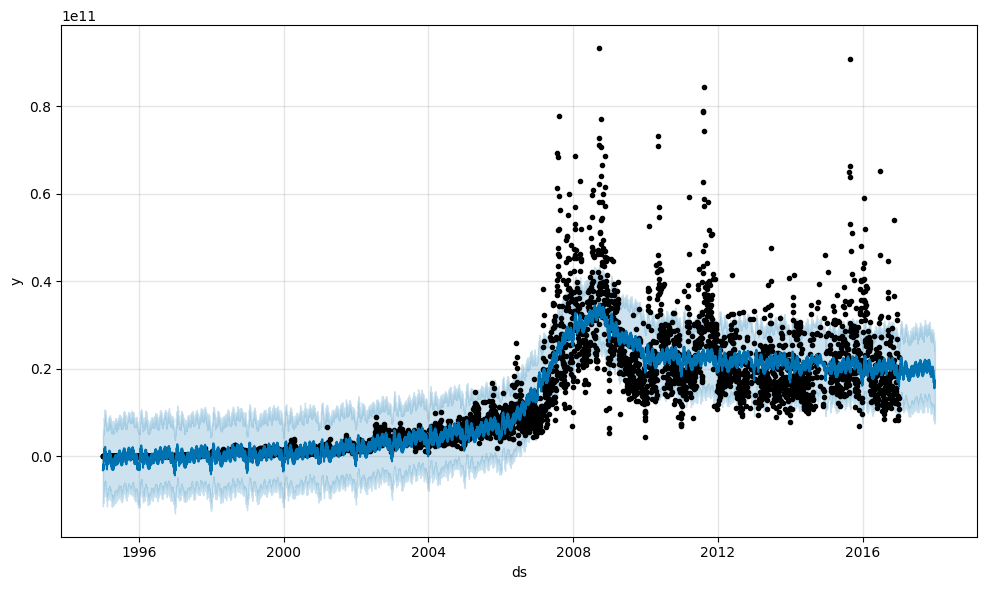

In [3]:
m.plot(forecast);

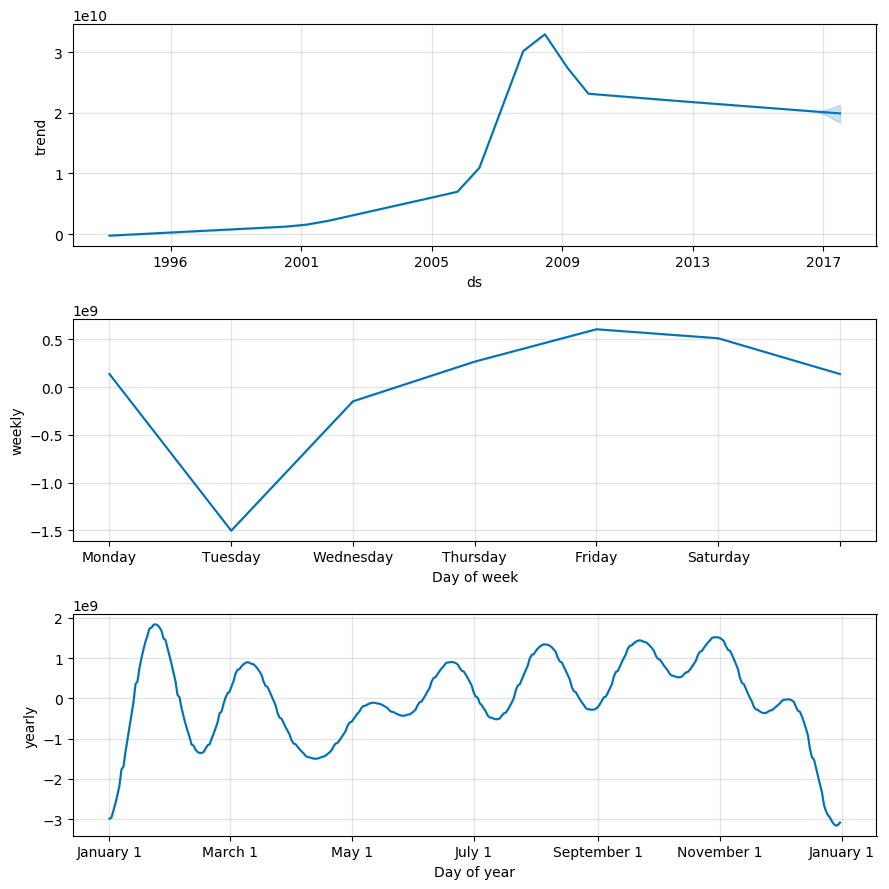

In [4]:
m.plot_components(forecast);

## Interpretation

As we can see in the above graphs, **Prophet** does a good enough job of incorporating the seasonality. i.e. Decembers are generally low volume periods and Januarys are generally high volume periods. The predicted notional volume does reflect these aspects.

It's hard to miss the fact that the volume gradually increases till the finantial crisis and is slowly decreasing ever since. Since we expect this trend to continue for the forseeable future, it might be better to only consider the data after 2010-01-01.

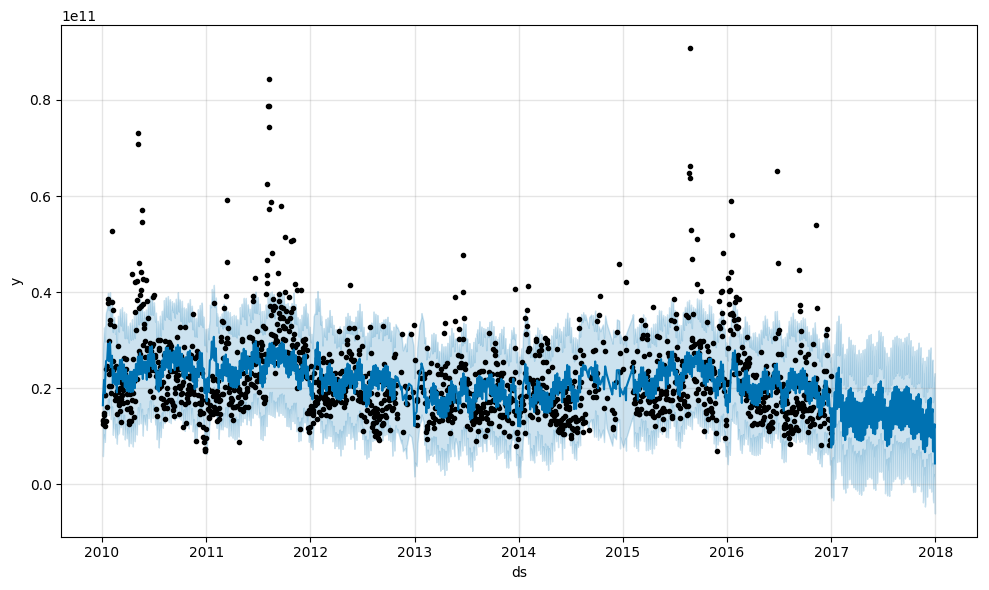

In [5]:
# Filter the DataFrame
df = df[df['ds'] >= '2010-01-01']

# Create and fit a new Prophet model
m = Prophet()
m.fit(df)

# Make the predictions
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

# Plot
m.plot(forecast);

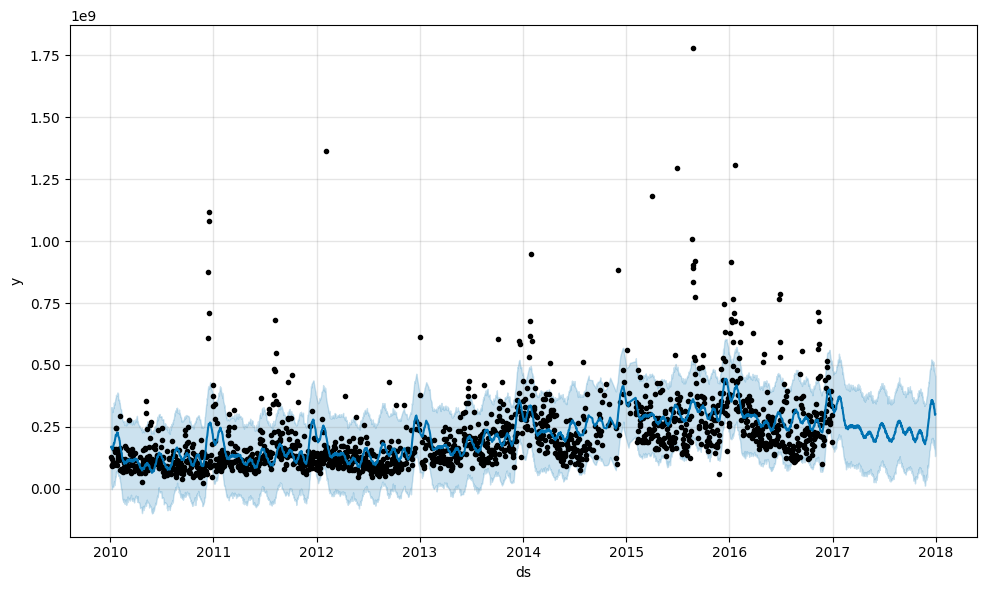

In [6]:
# Let's do this quickly for another ETF - VTI
df = pd.read_csv('VTI_notional.csv')

# Filter the DataFrame
df = df[df['ds'] >= '2010-01-01']

# Create and fit a new Prophet model
m = Prophet()
m.fit(df)

# Make the predictions
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

# Plot
m.plot(forecast);

In contrast with **SPY**, **VTI** volume has been increasing which is in line with the general trend in ETFs.

Even the seasonality factor is a bit different in the **VTI** notional volume.